In [1]:
import sys
import os

# obtiene la ruta absoluta del directorio 'src' desde la ubicación del notebook
src_path = os.path.abspath(os.path.join('..', 'src'))

# agrega la ruta a 'src' al sys.path si no está ya presente
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:

from sklearn.model_selection import train_test_split
import pandas as pd

feature_importances = pd.read_csv("/workspaces/LucasDellaMaestra-AlejandroNovellino-ReneRamirez-ProyectoFinal/data/processed/feature_importances.csv")

feature_importances

,Feature,Importance
0,deposit_type,0.626441
1,required_car_parking_spaces,0.100532
2,previous_cancellations,0.053840
3,market_segment,0.033842
4,total_of_special_requests,0.029375
5,country,0.018776
6,customer_type,0.015278
7,arrival_date_year,0.013345
8,previous_bookings_not_canceled,0.012518
9,reserved_room_type,0.011954


In [3]:
df_hoteles = pd.read_csv("/workspaces/LucasDellaMaestra-AlejandroNovellino-ReneRamirez-ProyectoFinal/data/processed/hotel_booking.csv")

df_hoteles

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,5,27,1,0,0,2,...,0,2,2,3,0,0,2,0.00,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,0,2,2,4,0,0,2,0.00,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,2,0,0,0,2,75.00,0,0
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,0,2,75.00,0,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,0,0,0,2,96.14,0,0
119386,0,0,102,2017,1,35,31,2,5,3,...,0,4,4,0,0,0,2,225.43,0,2
119387,0,0,34,2017,1,35,31,2,5,2,...,0,3,3,0,0,0,2,157.71,0,4
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,0,0,0,2,104.40,0,0


### Probamos con los primeros 5 features

In [4]:
# Toma las variables y el target
X = df_hoteles.drop(columns="is_canceled")
y = df_hoteles["is_canceled"]

top_features = feature_importances.head(5)['Feature'].tolist()
print("Top 5 features seleccionadas:", top_features)
#Subset de X con solo esas columnas
X_top = X[top_features]

Top 5 features seleccionadas: ['deposit_type', 'required_car_parking_spaces', 'previous_cancellations', 'market_segment', 'total_of_special_requests']


In [5]:
# Nueva división de datos
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

In [6]:
import xgboost as xgb


# Inicializamos el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenamiento
model.fit(X_train_top, y_train_top)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:11:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluación del modelo

In [7]:
# Predicciones y evaluación
y_pred = model.predict(X_test_top)

In [8]:
y_proba = model.predict_proba(X_test_top)


Matriz de confusion:


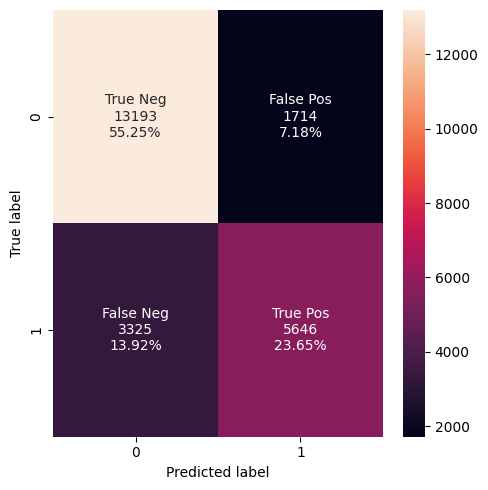

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from draw_utils import draw_confusion_matrix


# Matriz de confusión
conf_matrix = confusion_matrix(y_test_top, y_pred)
print("\nMatriz de confusion:")
draw_confusion_matrix(conf_matrix)


### Probamos con los primeros 10 features

In [10]:
# Toma las variables y el target
X = df_hoteles.drop(columns="is_canceled")
y = df_hoteles["is_canceled"]

top_ten_features = feature_importances.head(10)['Feature'].tolist()
print("Top 10 features seleccionadas:", top_ten_features)
#Subset de X con solo esas columnas
X_top_ten = X[top_ten_features]

Top 10 features seleccionadas: ['deposit_type', 'required_car_parking_spaces', 'previous_cancellations', 'market_segment', 'total_of_special_requests', 'country', 'customer_type', 'arrival_date_year', 'previous_bookings_not_canceled', 'reserved_room_type']


In [11]:
# Nueva división de datos
X_train_top_ten, X_test_top_ten, y_train_top_ten, y_test_top_ten = train_test_split(
    X_top_ten, y, test_size=0.2, random_state=42
)

In [12]:
import xgboost as xgb


# Inicializamos el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenamiento
model.fit(X_train_top_ten, y_train_top_ten)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:11:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluación del modelo

In [13]:
# Predicciones y evaluación
y_pred_ten = model.predict(X_test_top_ten)

In [14]:
y_proba_ten = model.predict_proba(X_test_top_ten)


Matriz de confusion:


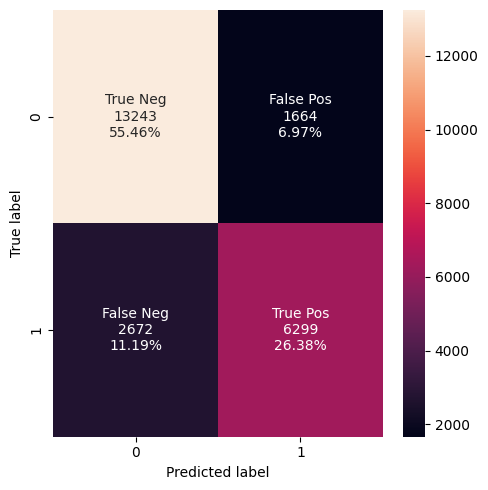

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from draw_utils import draw_confusion_matrix


# Matriz de confusión
conf_matrix = confusion_matrix(y_test_top_ten, y_pred_ten)
print("\nMatriz de confusion:")
draw_confusion_matrix(conf_matrix)
